In [23]:
!pip install h5py
!pip install matplotlib
!pip install seaborn
!pip install torch
!pip install tensorflow
!pip install scikit-learn
!pip install mne


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import h5py
import os
import matplotlib.pyplot as plt
import mne 

# Data Analysis

In [25]:
def get_dataset_name(filename_with_dir):
    filename_without_dir = filename_with_dir.split('/')[-1]
    temp = filename_without_dir.split('_')[:-1]
    dataset_name = '_'.join(temp)  
    return dataset_name

filename_path = "C:/Users/jagod/Desktop/UNI/BlockIV/DL/Seminar/project2/data/Intra/train/rest_105923_1.h5"


with h5py.File(filename_path, 'r') as f:
    dataset_name = get_dataset_name(filename_path)
    matrix = f.get(dataset_name)[()]
    print(type(matrix))
    print(matrix.shape)


<class 'numpy.ndarray'>
(248, 35624)


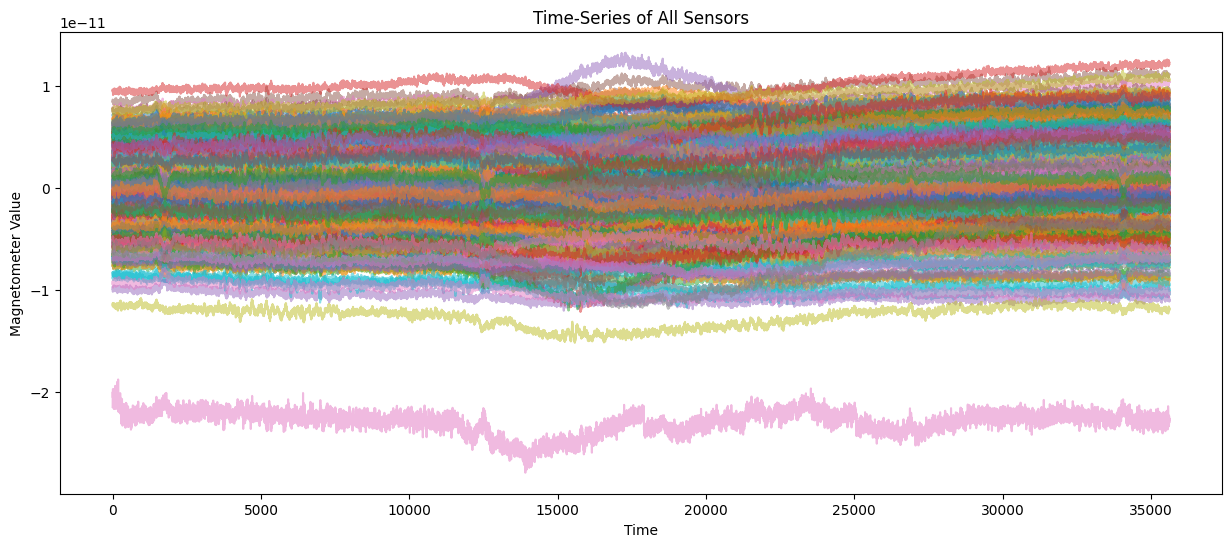

In [68]:


plt.figure(figsize=(15, 6))

for i in range(matrix.shape[0]):  # 248 sensors (rows)
    plt.plot(matrix[i], alpha=0.5)  # `alpha` adds transparency to avoid overlap

plt.xlabel('Time')
plt.ylabel('Magnetometer Value')
plt.title('Time-Series of All Sensors')
plt.show()


### Reading all files

In [79]:
dir_train = 'C:/Users/jagod/Desktop/UNI/BlockIV/DL/Seminar/project2/data/Intra/train'

# File listing
files_train = [f for f in os.listdir(dir_train) if f.endswith('.h5')]

# Preallocate lists
raws_train = []     # MNE Raw objects for training
labels_train = []   # Task labels for training

# Constants
sfreq = 2034  # Hz >> for downsampling later
n_channels = 248  # channel = sensor
ch_names = [f'MEG {i:03d}' for i in range(n_channels)]
ch_types = ['mag'] * n_channels
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# extract full task label (e.g., task_motor, rest)
def get_task_label(filename):
    parts = filename.split('_')
    if parts[0] == 'rest':
        return 'rest'
    elif parts[0] == 'task':
        label_parts = []
        for part in parts[1:]:
            if part.isdigit():
                break
            label_parts.append(part)
        return '_'.join(label_parts)
    else:
        return 'unknown'

# extract dataset name inside HDF5 file
def get_dataset_name(filename):
    return '_'.join(filename.split('_')[:-1])

# Loop through files
for fname in sorted(files_train):
    fpath = os.path.join(dir_train, fname)
    task_label = get_task_label(fname)

    with h5py.File(fpath, 'r') as f:
        dataset_name = get_dataset_name(fname)
        data = f[dataset_name][()]  # shape: (248, 35624)

    # Create MNE Raw object
    raw_train = mne.io.RawArray(data, info)

    # Store
    raws_train.append(raw_train)
    labels_train.append(task_label)


Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623

In [70]:
## Checking if order of labels is good >> GOOD YOOPIEEE :)

for fname, label in zip(sorted(files_train), labels_train):
    print(fname, label)


rest_105923_1.h5 rest
rest_105923_2.h5 rest
rest_105923_3.h5 rest
rest_105923_4.h5 rest
rest_105923_5.h5 rest
rest_105923_6.h5 rest
rest_105923_7.h5 rest
rest_105923_8.h5 rest
task_motor_105923_1.h5 motor
task_motor_105923_2.h5 motor
task_motor_105923_3.h5 motor
task_motor_105923_4.h5 motor
task_motor_105923_5.h5 motor
task_motor_105923_6.h5 motor
task_motor_105923_7.h5 motor
task_motor_105923_8.h5 motor
task_story_math_105923_1.h5 story_math
task_story_math_105923_2.h5 story_math
task_story_math_105923_3.h5 story_math
task_story_math_105923_4.h5 story_math
task_story_math_105923_5.h5 story_math
task_story_math_105923_6.h5 story_math
task_story_math_105923_7.h5 story_math
task_story_math_105923_8.h5 story_math
task_working_memory_105923_1.h5 working_memory
task_working_memory_105923_2.h5 working_memory
task_working_memory_105923_3.h5 working_memory
task_working_memory_105923_4.h5 working_memory
task_working_memory_105923_5.h5 working_memory
task_working_memory_105923_6.h5 working_memor

In [71]:
print(f"Number of recordings: {len(raws_train)}")
print(f"Unique tasks: {set(labels_train)}")
print(f"Info: {raw_train.info}")
data, times = raw_train[:, :]  # shape: (n_channels, n_times)
print("Min value:", data.min())
print("Max value:", data.max())


Number of recordings: 32
Unique tasks: {'story_math', 'rest', 'motor', 'working_memory'}
Info: <Info | 7 non-empty values
 bads: []
 ch_names: MEG 000, MEG 001, MEG 002, MEG 003, MEG 004, MEG 005, MEG 006, ...
 chs: 248 Magnetometers
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1017.0 Hz
 meas_date: unspecified
 nchan: 248
 projs: []
 sfreq: 2034.0 Hz
>
Min value: -1.6864036556096806e-10
Max value: 1.735352139764501e-11


Effective window size : 1.007 (s)
Plotting power spectral density (dB=True).


C:\Users\jagod\AppData\Local\Temp\ipykernel_18716\4091690891.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_train.compute_psd(fmax=125).plot(picks="data", amplitude=False)
c:\Users\jagod\Desktop\UNI\BlockIV\DL\Seminar\project2\venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


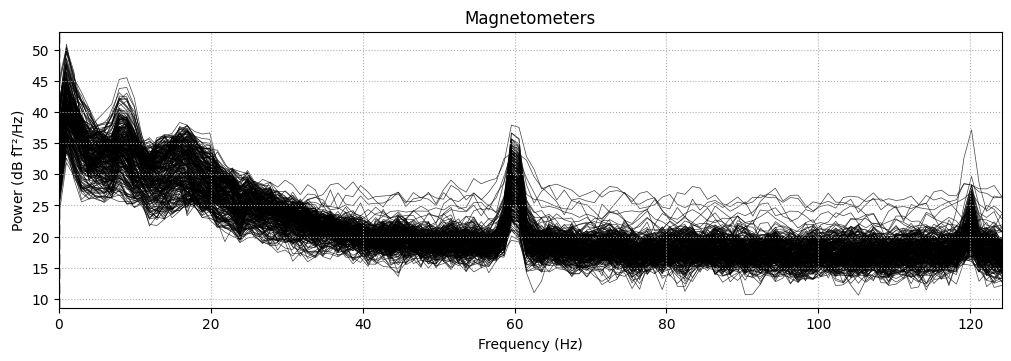

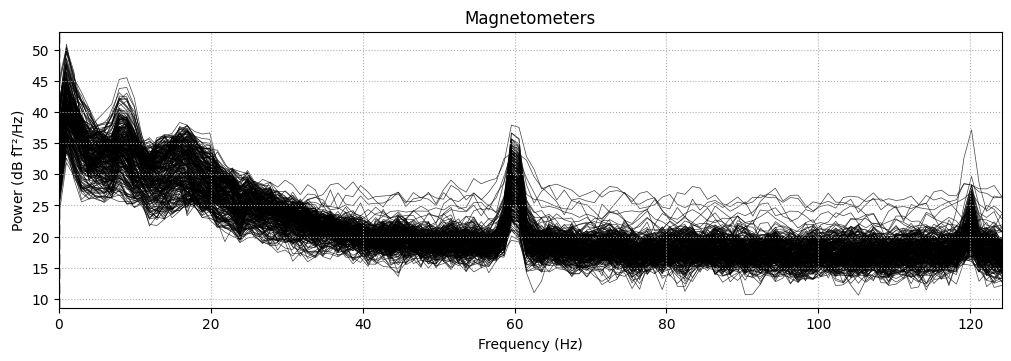

In [72]:
raw_train.compute_psd(fmax=125).plot(picks="data", amplitude=False)


Plotting task: rest


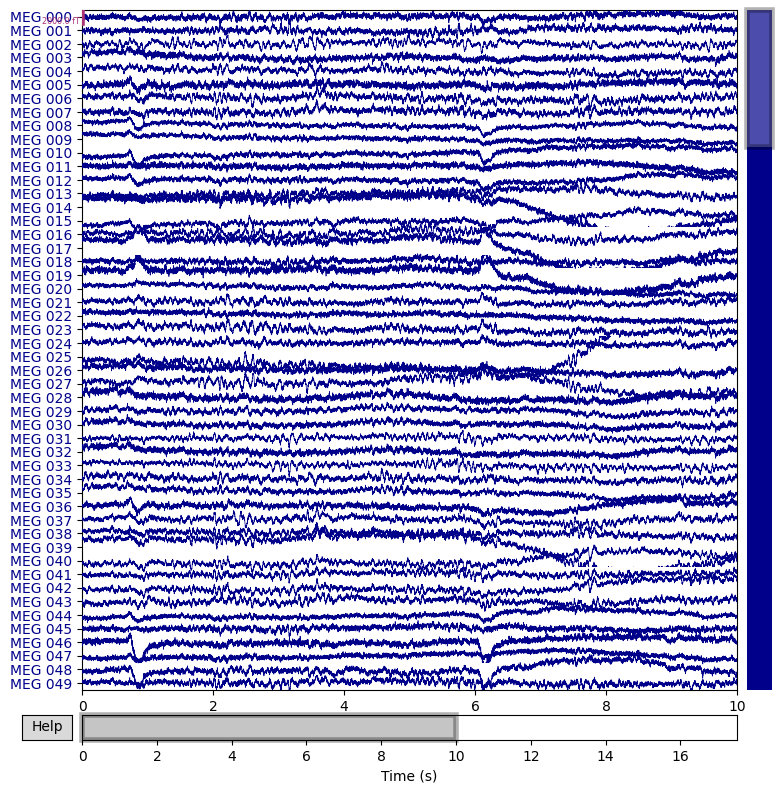

Plotting task: motor


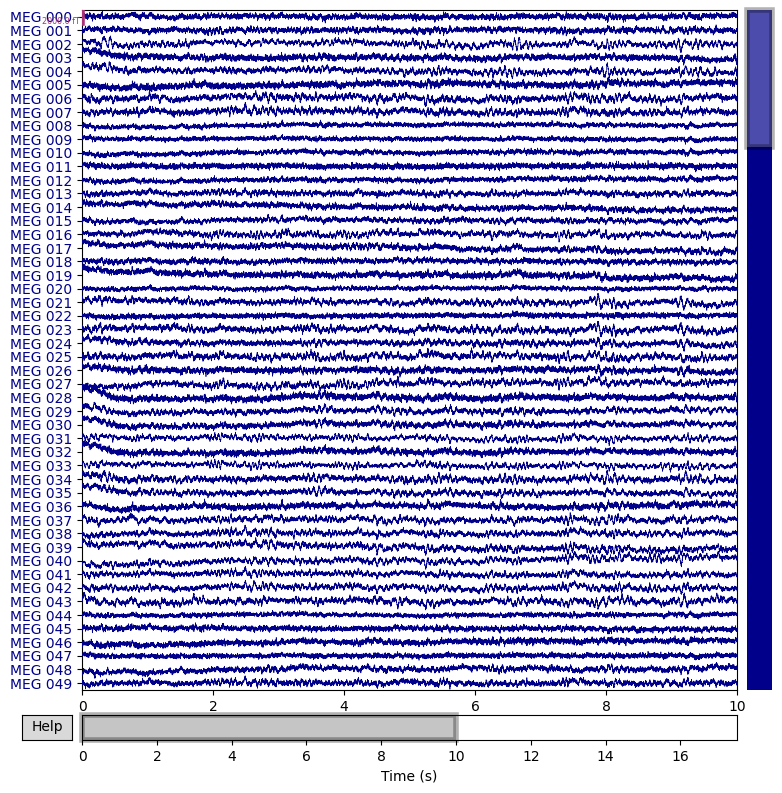

Plotting task: story_math


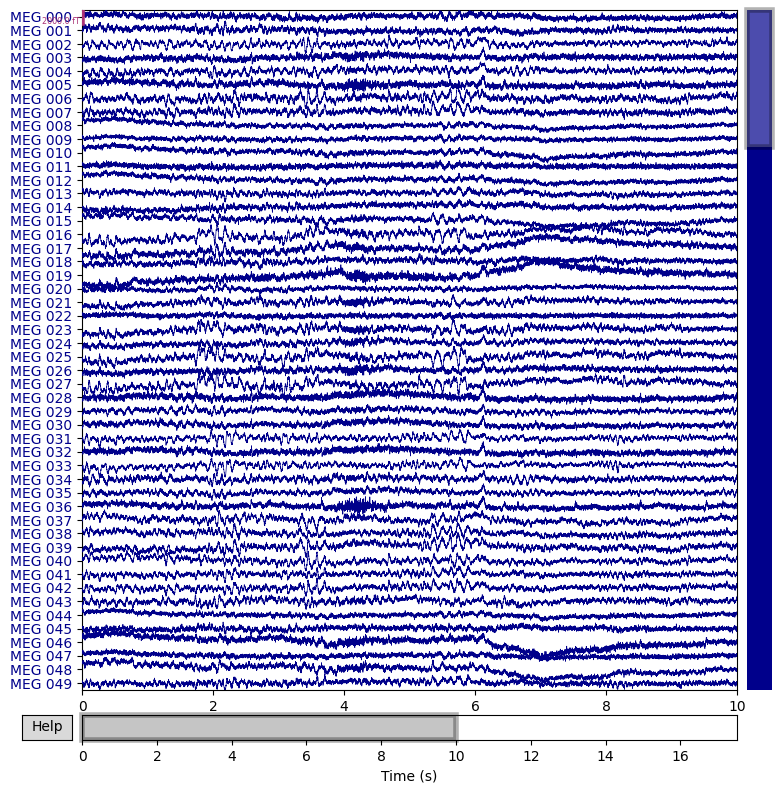

Plotting task: working_memory


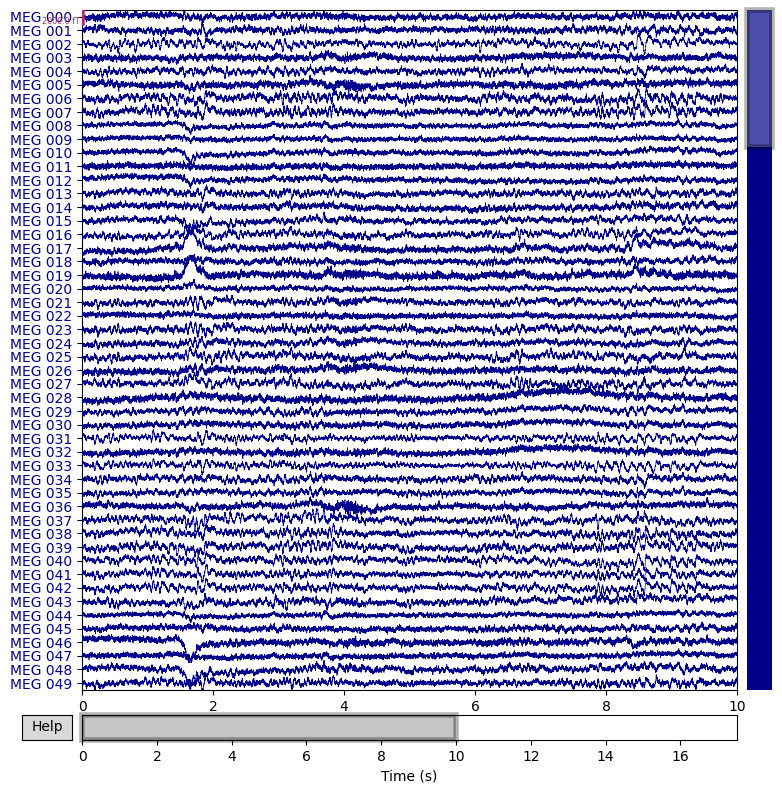

In [73]:
from collections import defaultdict

# Group raw objects by task
task_to_raws = defaultdict(list)
for raw, label in zip(raws_train, labels_train):
    task_to_raws[label].append(raw)

# Plot EXAMPLE of FILE from EACH TASK   
for task, raw_list in task_to_raws.items():
    print(f"Plotting task: {task}")
    # First trail each task
    raw_list[0].plot(n_channels=50, title=f'Task: {task}')


# Data Preprocessing

## Data Downsampling

From 2k Hz to 250Hz. (Look Google Doc why)

In [80]:
resampled_raws_train = []
for raw in raws_train:
    raw_resampled_train = raw.copy().resample(250, verbose=False)
    resampled_raws_train.append(raw_resampled_train)


In [81]:
# Before resampling
print("Original sfreqs and shapes:")
for i, raw in enumerate(raws_train[:3]):  # check first 3 for example
    print(f"Sample {i}: sfreq={raw.info['sfreq']}, shape={raw.get_data().shape}")

# After resampling
print("\nAfter resampling:")
for i, raw_resampled in enumerate(resampled_raws_train[:3]):
    print(f"Sample {i}: sfreq={raw_resampled.info['sfreq']}, shape={raw_resampled.get_data().shape}")


Original sfreqs and shapes:
Sample 0: sfreq=2034.0, shape=(248, 35624)
Sample 1: sfreq=2034.0, shape=(248, 35624)
Sample 2: sfreq=2034.0, shape=(248, 35624)

After resampling:
Sample 0: sfreq=250.0, shape=(248, 4379)
Sample 1: sfreq=250.0, shape=(248, 4379)
Sample 2: sfreq=250.0, shape=(248, 4379)


Effective window size : 8.192 (s)


Plotting power spectral density (dB=True).


C:\Users\jagod\AppData\Local\Temp\ipykernel_18716\893619026.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_resampled_train.compute_psd(fmax=125).plot(picks="data", amplitude=False)
c:\Users\jagod\Desktop\UNI\BlockIV\DL\Seminar\project2\venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


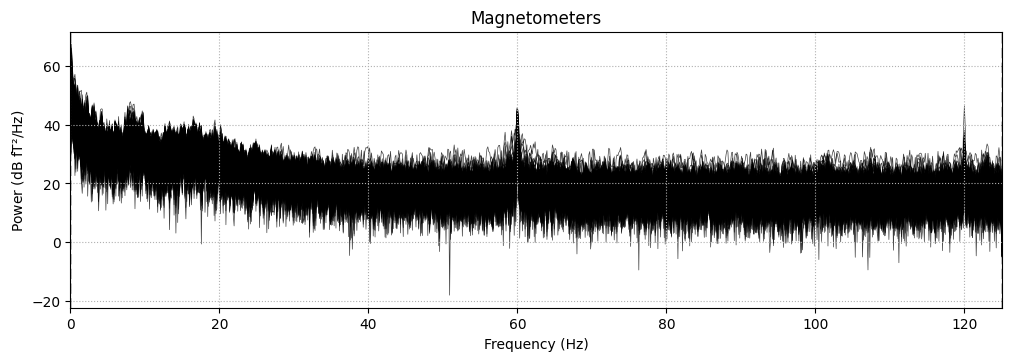

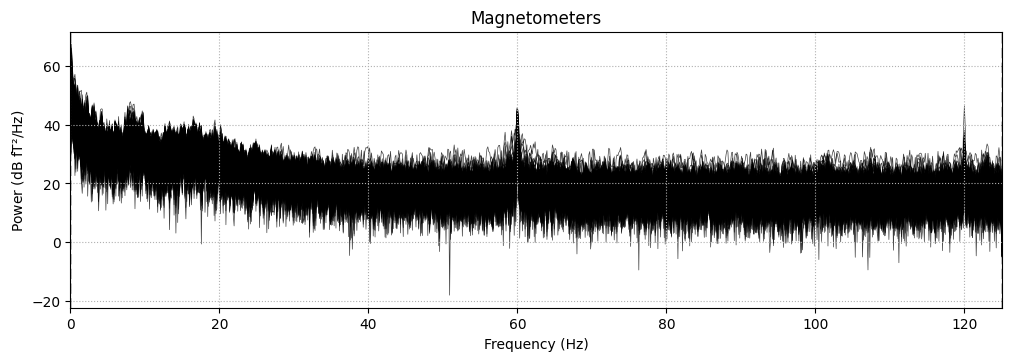

In [31]:
#Example of PSD OF ONE FILE (I THINK OF ONE FILE >> DOUBLE CHECK)

raw_resampled_train.compute_psd(fmax=125).plot(picks="data", amplitude=False)


Plotting task: rest


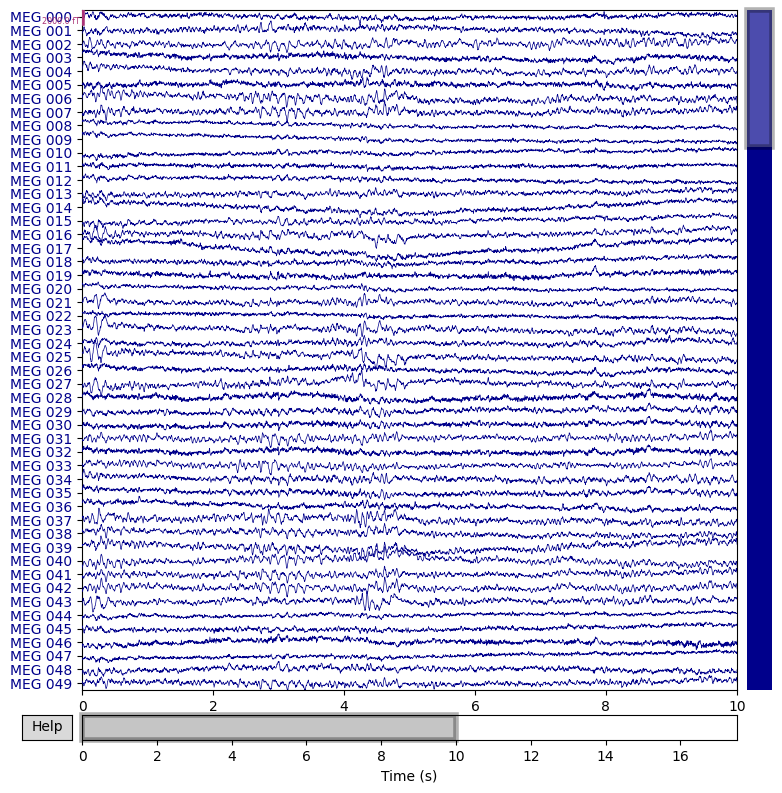

Plotting task: motor


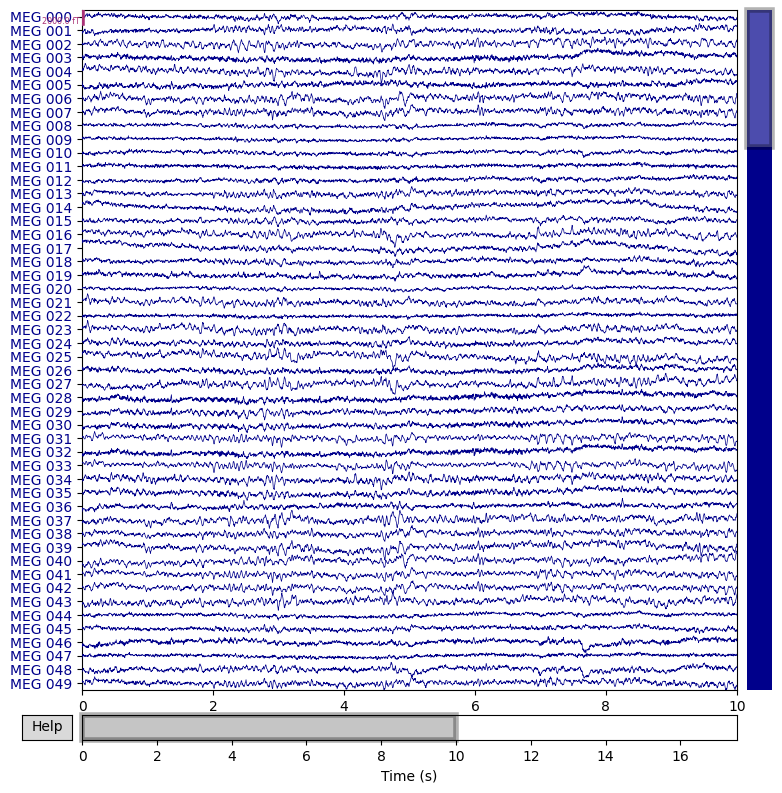

Plotting task: story_math


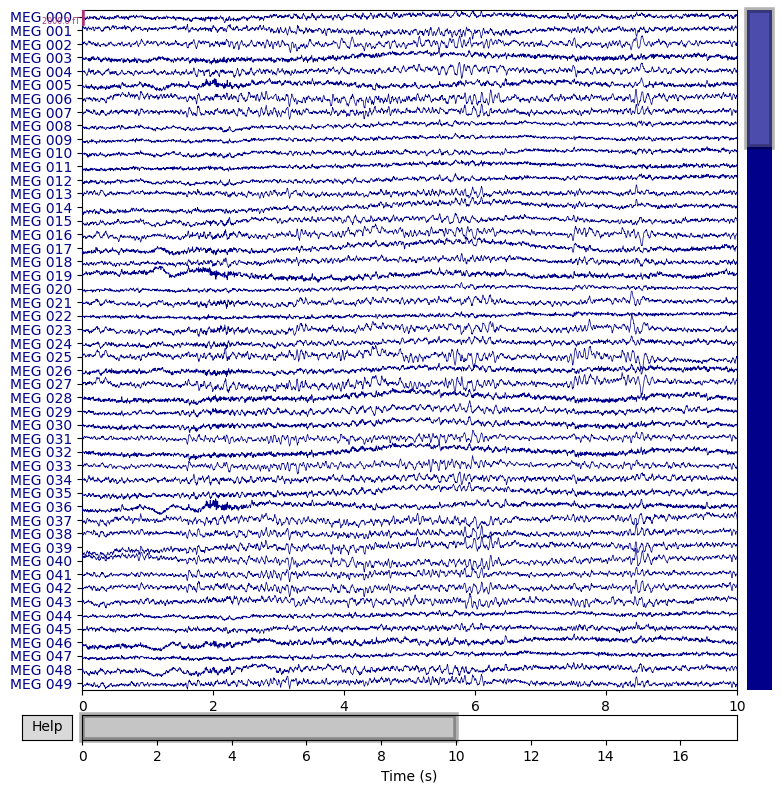

Plotting task: working_memory


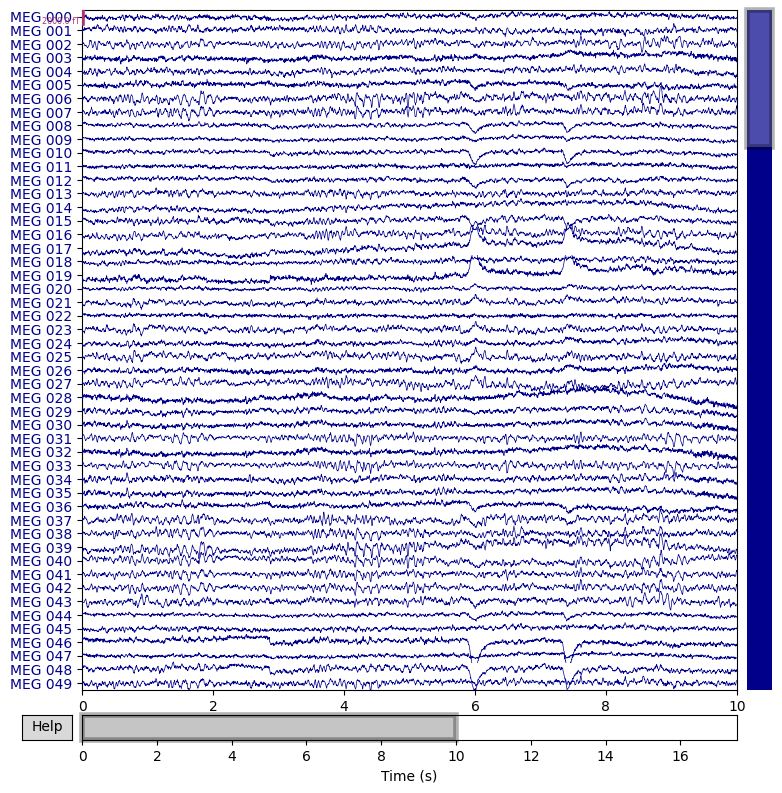

In [77]:
from collections import defaultdict

# Group resampled raw objects by task
task_to_raws = defaultdict(list)
for resampled, label in zip(resampled_raws_train, labels_train): 
    task_to_raws[label].append(resampled)

# Plot EXAMPLE of FILE from EACH TASK - DOWNSAMPLED  
for task, raw_list in task_to_raws.items():
    print(f"Plotting task: {task}")
    # Plot the third trial (index 2) of each task if it exists
    if len(raw_list) > 2:
        raw_list[2].plot(n_channels=50, title=f'Task: {task}')


## Reshaping data

In [82]:
import numpy as np

# Use resampled raws for getting data arrays
data_arrays_train = [raw.get_data() for raw in resampled_raws_train]  # each shape: (channels, times)

# Stack into (samples, channels, times)
data_train = np.stack(data_arrays_train)

print("Stacked data shape:", data_train.shape)  # should be (n_samples, n_channels, ~4379)

# Transpose to (samples, times, channels) for model input
data_train = data_train.transpose(0, 2, 1)

print("After transpose:", data_train.shape)  # (n_samples, ~4379, n_channels)


Stacked data shape: (32, 248, 4379)
After transpose: (32, 4379, 248)


In [83]:
# Checking if labels are ok AGAIN >> THEY ARE OK AGAIN YOOOPIE :)

for i in range(len(labels_train)):
    print(f"Sample {i}: Label={labels_train[i]}, Data shape={data_train[i].shape}")


Sample 0: Label=rest, Data shape=(4379, 248)
Sample 1: Label=rest, Data shape=(4379, 248)
Sample 2: Label=rest, Data shape=(4379, 248)
Sample 3: Label=rest, Data shape=(4379, 248)
Sample 4: Label=rest, Data shape=(4379, 248)
Sample 5: Label=rest, Data shape=(4379, 248)
Sample 6: Label=rest, Data shape=(4379, 248)
Sample 7: Label=rest, Data shape=(4379, 248)
Sample 8: Label=motor, Data shape=(4379, 248)
Sample 9: Label=motor, Data shape=(4379, 248)
Sample 10: Label=motor, Data shape=(4379, 248)
Sample 11: Label=motor, Data shape=(4379, 248)
Sample 12: Label=motor, Data shape=(4379, 248)
Sample 13: Label=motor, Data shape=(4379, 248)
Sample 14: Label=motor, Data shape=(4379, 248)
Sample 15: Label=motor, Data shape=(4379, 248)
Sample 16: Label=story_math, Data shape=(4379, 248)
Sample 17: Label=story_math, Data shape=(4379, 248)
Sample 18: Label=story_math, Data shape=(4379, 248)
Sample 19: Label=story_math, Data shape=(4379, 248)
Sample 20: Label=story_math, Data shape=(4379, 248)
Sample

In [84]:
print(data_train.shape)

(32, 4379, 248)


In [13]:
## INFO FOR GROUP >> EPOCHING IS USED WHEN EACH FILE HAS MANY TASK, IN OUR CASE WE NEED TO CLASSIFY ONE FILE = ONE TASK, EPOCHS NO NEEDED

## For skfold >> FAIL

In [ ]:

'''
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

def cnn_att_lstm(input_shape, num_classes=4):
    model = Sequential([
        Conv1D(64, kernel_size=10, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=3),
        LSTM(64, return_sequences=False),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

'''

In [ ]:
'''
def make_custom_folds(labels, n_folds=8):
    labels = np.array(labels)
    unique_classes = np.unique(labels)
    class_indices = {cls: np.where(labels == cls)[0] for cls in unique_classes}
    folds = []

    for fold_idx in range(n_folds):
        val_idx = []
        train_idx = []

        for cls in unique_classes:
            cls_files = class_indices[cls]
            val_file = cls_files[fold_idx]
            train_files = np.delete(cls_files, fold_idx)

            val_idx.append(val_file)
            train_idx.extend(train_files)

        folds.append((np.array(train_idx), np.array(val_idx)))

    return folds
'''

In [20]:
'''
def train_kfold(data, labels, build_model_fn, n_folds=8, epochs=10, batch_size=8):
    folds = make_custom_folds(labels, n_folds=n_folds)
    y_true, y_pred = [], []

    callbacks = [EarlyStopping(patience=3, restore_best_weights=True)]

    for fold_num, (train_i, val_i) in enumerate(folds, 1):
        print(f"\nFold {fold_num}")

        # Split data and labels
        X_train, X_val = data[train_i], data[val_i]
        y_train, y_val = labels[train_i], labels[val_i]

        # Shuffle train data
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        # Check shapes
        print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
        print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

        # Check label distribution
        print("Train label distribution:", np.bincount(y_train))
        print("Val label distribution:", np.bincount(y_val))

        # Normalize
        mean = X_train.mean(axis=(0, 1), keepdims=True)
        std = X_train.std(axis=(0, 1), keepdims=True) + 1e-8
        X_train = (X_train - mean) / std
        X_val = (X_val - mean) / std



        print(f"Train data mean (should be ~0): {X_train.mean():.5f}")
        print(f"Train data std (should be ~1): {X_train.std():.5f}")

        # Build and train model
        model = build_model_fn(X_train.shape[1:], num_classes=4)
        model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=1
        )

        # Predict and record
        val_pred = model.predict(X_val).argmax(axis=1)
        print("Validation predictions:", val_pred)
        print("Validation true labels:", y_val)

        y_true.extend(y_val)
        y_pred.extend(val_pred)

    return np.array(y_true), np.array(y_pred)
'''

'\ndef train_kfold(data, labels, build_model_fn, n_folds=8, epochs=10, batch_size=8):\n    folds = make_custom_folds(labels, n_folds=n_folds)\n    y_true, y_pred = [], []\n\n    callbacks = [EarlyStopping(patience=3, restore_best_weights=True)]\n\n    for fold_num, (train_i, val_i) in enumerate(folds, 1):\n        print(f"\nFold {fold_num}")\n\n        # Split data and labels\n        X_train, X_val = data[train_i], data[val_i]\n        y_train, y_val = labels[train_i], labels[val_i]\n\n        # Shuffle train data\n        indices = np.arange(len(X_train))\n        np.random.shuffle(indices)\n        X_train = X_train[indices]\n        y_train = y_train[indices]\n\n        # Check shapes\n        print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")\n        print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")\n\n        # Check label distribution\n        print("Train label distribution:", np.bincount(y_train))\n        print("Val label distribution:", 

## LOOCV

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Input

def simple_baseline_cnn(input_shape, num_classes=4):
    model = Sequential()
    model.add(Input(shape=input_shape))  # (4379, 248)
    model.add(Reshape((input_shape[0], input_shape[1], 1)))  # add channel dim → (4379, 248, 1) 4D NEEDED FOR CONV2D

    # Just one small Conv layer with fewer filters and no pooling
    model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', padding='same'))
    
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model


In [92]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping

def train_loocv_model(data, labels, build_model_fn, epochs=30, batch_size=16, verbose=1):
    # Shuffle data and labels together
    data, labels = shuffle(data, labels, random_state=42)
    n_samples = data.shape[0]
    input_shape = data.shape[1:]  # (time_steps, channels)
    num_classes = len(np.unique(labels))
    
    val_accuracies = []
    y_true = []
    y_pred = []
    y_conf = []  # stores confidence (probability of predicted class)

    for val_idx in range(n_samples):
        print(f"\nLOOCV Fold {val_idx+1}/{n_samples}")
        
        # Split train and val
        train_idx = np.delete(np.arange(n_samples), val_idx)
        print(f"  Train indices: {train_idx}")
        print(f"  Validation index: {val_idx}")
        
        X_train, y_train = data[train_idx], np.array(labels)[train_idx]
        X_val, y_val = data[val_idx], labels[val_idx]
        X_val = X_val[np.newaxis, ...]  # add batch dim for single sample
        
        # Normalize
        scaler = StandardScaler()
        X_train_flat = X_train.reshape(-1, input_shape[1])
        scaler.fit(X_train_flat)
        
        X_train_norm = scaler.transform(X_train_flat).reshape(X_train.shape)
        X_val_norm = scaler.transform(X_val.reshape(-1, input_shape[1])).reshape(X_val.shape)
        
        # Build model
        model = build_model_fn(input_shape, num_classes)
        es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=verbose)
        
        # Train
        model.fit(X_train_norm, y_train, 
                  validation_data=(X_val_norm, np.array([y_val])),
                  epochs=epochs, batch_size=batch_size, verbose=verbose,
                  callbacks=[es])
        
        # Predict class probabilities
        val_pred_prob = model.predict(X_val_norm, verbose=0)  # shape: (1, num_classes)
        val_pred_label = np.argmax(val_pred_prob, axis=1)[0]
        val_confidence = np.max(val_pred_prob)  # max prob = confidence in prediction

        # Store results
        y_true.append(y_val)
        y_pred.append(val_pred_label)
        y_conf.append(val_confidence)

        # Evaluate
        val_loss, val_acc = model.evaluate(X_val_norm, np.array([y_val]), verbose=0)
        print(f"Validation accuracy for fold {val_idx+1}: {val_acc:.4f}")
        val_accuracies.append(val_acc)
    
    print(f"\nLOOCV Mean validation accuracy: {np.mean(val_accuracies):.4f} ± {np.std(val_accuracies):.4f}")
    return val_accuracies, y_true, y_pred, y_conf


In [94]:
# Ensure labels are numeric if needed
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
numeric_labels = le.fit_transform(labels_train)  

# Train with LOOCV
val_accuracies, y_true, y_pred, y_conf = train_loocv_model(data_train, numeric_labels, simple_baseline_cnn,
                                  epochs=10, batch_size=16, verbose=1)



LOOCV Fold 1/32
  Train indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
  Validation index: 0
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.5403 - loss: 78.2832WARNING:tensorflow:5 out of the last 38 calls to <function TensorFlowTrainer._make_function.<locals>.multi_step_on_iterator at 0x0000014F8D2B9A80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.

In [95]:
#Check if shape is OK before saving model, if not, run again code beffore (IDK WHY THO LOLLLL)
print(data_train.shape)


(32, 4379, 248)


In [96]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import save_model

# Assume `data` and `numeric_labels` are your full training set
input_shape = data_train.shape[1:]  # (time_steps, channels)
num_classes = len(np.unique(numeric_labels))

# Normalize full training data
scaler = StandardScaler()
train_data_flat = data_train.reshape(-1, input_shape[1])  # flatten time_steps to 2D for scaler >> sclaing per channeel
scaler.fit(train_data_flat)
data_norm = scaler.transform(train_data_flat).reshape(data_train.shape)

# Build and train final model on full data
model = simple_baseline_cnn(input_shape, num_classes)
model.fit(data_norm, numeric_labels, epochs=10, batch_size=16)

# Save model and scaler
model.save('my_beautiful_model_loocv.keras')

import joblib
joblib.dump(scaler, 'scaler.save')


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 961ms/step - accuracy: 0.3750 - loss: 8.8506
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 855ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 858ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 923ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00   
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 977ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 814ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 919ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 853ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 870ms/step - accuracy: 1.0000 - loss: 0.0000e+00


['scaler.save']

## S KFolds

In [97]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping

def train_skfold_model(data, labels, build_model_fn, n_splits=5, epochs=30, batch_size=16, verbose=1):
    data, labels = shuffle(data, labels, random_state=42)
    input_shape = data.shape[1:]  # (time_steps, channels)
    num_classes = len(np.unique(labels))

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    val_accuracies = []
    y_true = []
    y_pred = []
    y_conf = []

    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(data, labels)):
        print(f"\nSKFold Fold {fold_idx+1}/{n_splits}")
        print(f"  Train indices: {train_idx}")
        print(f"  Validation indices: {val_idx}")

        X_train, y_train = data[train_idx], np.array(labels)[train_idx]
        X_val, y_val = data[val_idx], np.array(labels)[val_idx]

        # Normalize
        scaler = StandardScaler()
        X_train_flat = X_train.reshape(-1, input_shape[1])
        scaler.fit(X_train_flat)

        X_train_norm = scaler.transform(X_train_flat).reshape(X_train.shape)
        X_val_norm = scaler.transform(X_val.reshape(-1, input_shape[1])).reshape(X_val.shape)

        # Build model
        model = build_model_fn(input_shape, num_classes)
        es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=verbose)

        # Train
        model.fit(X_train_norm, y_train,
                  validation_data=(X_val_norm, y_val),
                  epochs=epochs, batch_size=batch_size, verbose=verbose,
                  callbacks=[es])

        # Predict class probabilities
        val_pred_prob = model.predict(X_val_norm, verbose=0)
        val_pred_label = np.argmax(val_pred_prob, axis=1)
        val_confidence = np.max(val_pred_prob, axis=1)

        # Store results for each validation sample
        y_true.extend(y_val)
        y_pred.extend(val_pred_label)
        y_conf.extend(val_confidence)

        # Evaluate
        val_loss, val_acc = model.evaluate(X_val_norm, y_val, verbose=0)
        print(f"Validation accuracy for fold {fold_idx+1}: {val_acc:.4f}")
        val_accuracies.append(val_acc)

    print(f"\nSKFold Mean validation accuracy: {np.mean(val_accuracies):.4f} ± {np.std(val_accuracies):.4f}")
    return val_accuracies, y_true, y_pred, y_conf


In [102]:
print(len(labels_train))  # should be 32
print(data_train.shape[0])      # should be 32


32
32


In [104]:


from sklearn.preprocessing import LabelEncoder

# Suppose labels is your list or array of string labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_train)

# Now use labels_encoded in your training function
train_skfold_model(data_train, labels_encoded, simple_baseline_cnn, n_splits=5, epochs=10, batch_size=16)




SKFold Fold 1/5
  Train indices: [ 1  2  4  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 28 29
 30]
  Validation indices: [ 0  3  5  6 17 27 31]
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1808 - loss: 12.0569 - val_accuracy: 0.5714 - val_loss: 34.7437
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 975ms/step - accuracy: 0.4658 - loss: 80.6688 - val_accuracy: 0.5714 - val_loss: 19.4495
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 978ms/step - accuracy: 0.4867 - loss: 27.5478 - val_accuracy: 0.5714 - val_loss: 0.6813
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7567 - loss: 0.7097 - val_accuracy: 0.7143 - val_loss: 0.5921
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 926ms/step - accuracy: 0.7567 - loss: 0.6801 - val_accuracy: 0.7143 - val_loss: 0.5915
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 848ms/step - accuracy: 0.7567 - loss: 0.7368 - val_accuracy: 0.7143 - val_loss: 0.5908
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step - accuracy: 0.7775 - loss: 0.7072 - va

([0.7142857313156128, 0.7142857313156128, 0.6666666865348816, 1.0, 1.0],
 [np.int64(3),
  np.int64(2),
  np.int64(0),
  np.int64(3),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(3),
  np.int64(2),
  np.int64(3),
  np.int64(2),
  np.int64(1),
  np.int64(0),
  np.int64(3),
  np.int64(2),
  np.int64(1),
  np.int64(3),
  np.int64(2),
  np.int64(0),
  np.int64(1),
  np.int64(2),
  np.int64(0),
  np.int64(2),
  np.int64(3),
  np.int64(0),
  np.int64(3),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(2)],
 [np.int64(2),
  np.int64(2),
  np.int64(0),
  np.int64(2),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(3),
  np.int64(0),
  np.int64(3),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(3),
  np.int64(2),
  np.int64(3),
  np.int64(3),
  np.int64(2),
  np.int64(0),
  np.int64(1),
  np.int64(2),
  np.int64(0),
  np.int64(2),
  np.int64(3),
  np.int64(0),
  np.int64(3),
  np.int64(1),
  np.int64(

## Load test files 

In [ ]:
import os
import h5py
import mne
import numpy as np

data_test = 'C:/Users/jagod/Desktop/UNI/BlockIV/DL/Seminar/project2/data/Intra/test'

files = [f for f in os.listdir(data_test) if f.endswith('.h5')]

raws_test = []    
labels_test = []  
sfreq = 2034  # Hz >> for downsampling later
n_channels = 248 # channel = sensor
ch_names = [f'MEG {i:03d}' for i in range(n_channels)]
ch_types = ['mag'] * n_channels
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

def get_task_label(filename):
    parts = filename.split('_')
    if parts[0] == 'rest':
        return 'rest'
    elif parts[0] == 'task':
        label_parts = []
        for part in parts[1:]:
            if part.isdigit():
                break
            label_parts.append(part)
        return '_'.join(label_parts)
    else:
        return 'unknown'

def get_dataset_name(filename):
    return '_'.join(filename.split('_')[:-1])

data_arrays_test = []
for fname in sorted(files):
    fpath = os.path.join(data_test, fname)
    task_label = get_task_label(fname)

    with h5py.File(fpath, 'r') as f:
        dataset_name = get_dataset_name(fname)
        raw_data = f[dataset_name][()]  # renamed to avoid overwrite
    raw_test = mne.io.RawArray(raw_data, info)

    raws_test.append(raw_test)
    labels_test.append(task_label)
    raw_resampled_test = raw_test.copy().resample(250, verbose=False)
    data_arrays_test.append(raw_resampled_test.get_data())

    print(f"File: {fname}, original samples: {raw_data.shape[1]}, resampled samples: {raw_resampled_test.n_times}, label: {task_label}")

data_test_np = np.stack(data_arrays_test)  # shape: (n_files, channels, time_steps)
data_test_np = data_test_np.transpose(0, 2, 1)  # now (n_files, time_steps, channels)
print(f"Test data shape (samples, time_steps, channels): {data_test_np.shape}")
print(f"Test labels: {labels_test}")


Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
File: rest_105923_10.h5, original samples: 35624, resampled samples: 4379, label: rest
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
File: rest_105923_9.h5, original samples: 35624, resampled samples: 4379, label: rest
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
File: task_motor_105923_10.h5, original samples: 35624, resampled samples: 4379, label: motor
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
File: task_motor_105923_9.h5, original samples: 35624, resampled samples: 4379, label: motor
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 se

In [42]:
resampled_raws_test = []
for raw in raws_test:
    raw_resampled_test = raw_test.copy().resample(250, verbose=False)
    resampled_raws_test.append(raw_resampled_test)


In [43]:
import numpy as np

data_arrays_test = [raw_test.get_data() for raw in resampled_raws_test]  # list of (channels, times)
data_test = np.stack(data_arrays_test)  # (samples, channels, times)
print("Stacked data shape:", data_test.shape)
data_test = data_test.transpose(0, 2, 1)  # (samples, times, channels)
print("After transpose:", data_test.shape)


Stacked data shape: (8, 248, 35624)
After transpose: (8, 35624, 248)


In [45]:
# Checking if labels are ok AGAIN >> THEY ARE OK AGAIN YOOOPIE :)

for i in range(len(labels_test)):
    print(f"Sample {i}: Label={labels_test[i]}, Data shape={data_test[i].shape}")


Sample 0: Label=rest, Data shape=(35624, 248)
Sample 1: Label=rest, Data shape=(35624, 248)
Sample 2: Label=motor, Data shape=(35624, 248)
Sample 3: Label=motor, Data shape=(35624, 248)
Sample 4: Label=story_math, Data shape=(35624, 248)
Sample 5: Label=story_math, Data shape=(35624, 248)
Sample 6: Label=working_memory, Data shape=(35624, 248)
Sample 7: Label=working_memory, Data shape=(35624, 248)


### Scale the test data using scaler used on training

In [46]:
import joblib  

# Load the saved scaler
scaler = joblib.load('scaler.save')
input_shape = data_test_np.shape[1:]  # (time_steps, channels)
# Flatten test data to 2D: (samples * time_steps, channels)
test_flat = data_test_np.reshape(-1, input_shape[1])
# Transform test data using loaded scaler
test_scaled_flat = scaler.transform(test_flat)
# Reshape back to original test shape
test_scaled = test_scaled_flat.reshape(data_test_np.shape)

print(f"Test data scaled shape: {test_scaled.shape}")


Test data scaled shape: (8, 4379, 248)


### Run model on test <3

In [47]:
from tensorflow.keras.models import load_model

model = load_model('my_model.keras')  # or .h5 if you saved like that


In [51]:
import os
y_test = [get_task_label(f) for f in files]
y_test_numeric = le.transform(y_test)

print(y_test)

['rest', 'rest', 'motor', 'motor', 'story_math', 'story_math', 'working_memory', 'working_memory']


In [52]:
from sklearn.metrics import accuracy_score

pred_probs = model.predict(test_scaled)  # shape: (n_samples, num_classes)
pred_classes = pred_probs.argmax(axis=1)  # class indices predicted
pred_labels = le.inverse_transform(pred_classes)
print("Predicted labels:", pred_labels)
accuracy = accuracy_score(y_test_numeric, pred_classes)
print(f"Test accuracy: {accuracy:.4f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Predicted labels: ['rest' 'rest' 'motor' 'motor' 'story_math' 'story_math' 'working_memory'
 'working_memory']
Test accuracy: 1.0000


In [53]:
print("Predicted:", y_test)
print("True:", y_test)


Predicted: ['rest', 'rest', 'motor', 'motor', 'story_math', 'story_math', 'working_memory', 'working_memory']
True: ['rest', 'rest', 'motor', 'motor', 'story_math', 'story_math', 'working_memory', 'working_memory']
